# Correlation Analysis

In [48]:
#Dependancies 
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

In [49]:
#Store CSV File in DataFrame
us_nc_df = pd.read_csv("US_NC_Combined.csv")

us_nc_df.head()

,Unnamed: 0,date,US Population,US Deaths,US DeathIncrease,US inICUCumulative,US inICUCurrently,US HospitalizedIncrease,US HospitalizedCurrently,US HospitalizedCumulative,...,NC InIcuCumulative,NC InIcuCurrently,NC Negative,NC NegativeIncrease,NC OnVentilatorCumulative,NC OnVentilatorCurrently,NC Positive,NC PositiveIncrease,NC TotalTestResults,NC TotalTestResultsIncrease
0,0,2021-03-07,332031554,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,0.0,9688838.0,0.0
1,1,2021-03-06,332031554,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,2027.0,9688838.0,38654.0
2,2,2021-03-05,332031554,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,...,0.0,314.0,0.0,0.0,0.0,0.0,870149.0,2093.0,9650184.0,44487.0
3,3,2021-03-04,332031554,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,...,0.0,326.0,0.0,0.0,0.0,0.0,868056.0,2502.0,9605697.0,44050.0
4,4,2021-03-03,332031554,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,...,0.0,332.0,0.0,0.0,0.0,0.0,865554.0,2145.0,9561647.0,19976.0


In [50]:
#Column List
list(us_nc_df.columns)

['Unnamed: 0',
 'date',
 'US Population',
 'US Deaths',
 'US DeathIncrease',
 'US inICUCumulative',
 'US inICUCurrently',
 'US HospitalizedIncrease',
 'US HospitalizedCurrently',
 'US HospitalizedCumulative',
 'US Negative',
 'US NegativeIncrease',
 'US OnVentilatorCumulative',
 'US OnVentilatorCurrently',
 'US Positive',
 'US PositiveIncrease',
 'US TotalTestResults',
 'US TotalTestResultsIncrease',
 'NC Population',
 'NC death',
 'NC DeathIncrease',
 'NC HospitalizedCumulative',
 'NC HospitalizedCurrently',
 'NC HospitalizedIncrease',
 'NC InIcuCumulative',
 'NC InIcuCurrently',
 'NC Negative',
 'NC NegativeIncrease',
 'NC OnVentilatorCumulative',
 'NC OnVentilatorCurrently',
 'NC Positive',
 'NC PositiveIncrease',
 'NC TotalTestResults',
 'NC TotalTestResultsIncrease']

# Correlation Between Positive Cases & Hospitalzations? - Line Chart

In [51]:
# State Needed Columns
nc_us_positive_hospitalzations = us_nc_df[['date','US Population','US HospitalizedCurrently','US Positive','NC Population','NC HospitalizedCurrently','NC Positive']].copy()

# Creates Timeframe to Analyze
nc_us_positive_hospitalzations['date'] = pd.to_datetime(nc_us_positive_hospitalzations['date'])
print(nc_us_positive_hospitalzations['date'].dtypes)

# Set date as index
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.set_index('date')

# Reverse the order for graphing
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.iloc[::-1]

# Drop rows with null values
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.dropna()

# Add per-capita rows
nc_us_positive_hospitalzations['US Hospitalized Per Capita'] = (nc_us_positive_hospitalzations['US HospitalizedCurrently'] / nc_us_positive_hospitalzations['US Population']) * 100000
nc_us_positive_hospitalzations['NC Hospitalized Per Capita'] = (nc_us_positive_hospitalzations['NC HospitalizedCurrently'] / nc_us_positive_hospitalzations['NC Population']) * 100000
nc_us_positive_hospitalzations['US Positive Per Capita'] = (nc_us_positive_hospitalzations['US Positive'] / nc_us_positive_hospitalzations['US Population']) * 100000
nc_us_positive_hospitalzations['NC Positive Per Capita'] = (nc_us_positive_hospitalzations['NC Positive'] / nc_us_positive_hospitalzations['NC Population']) * 100000

nc_us_positive_hospitalzations.head()

datetime64[ns]


,US Population,US HospitalizedCurrently,US Positive,NC Population,NC HospitalizedCurrently,NC Positive,US Hospitalized Per Capita,NC Hospitalized Per Capita,US Positive Per Capita,NC Positive Per Capita
date,,,,,,,,,,
2020-03-04,331511512,0.0,242.0,10449445.0,0.0,1.0,0.0,0.0,0.072999,0.00957
2020-03-05,331511512,0.0,307.0,10449445.0,0.0,1.0,0.0,0.0,0.092606,0.00957
2020-03-06,331511512,0.0,445.0,10449445.0,0.0,2.0,0.0,0.0,0.134234,0.01914
2020-03-07,331511512,0.0,587.0,10449445.0,0.0,2.0,0.0,0.0,0.177068,0.01914
2020-03-08,331511512,0.0,757.0,10449445.0,0.0,2.0,0.0,0.0,0.228348,0.01914


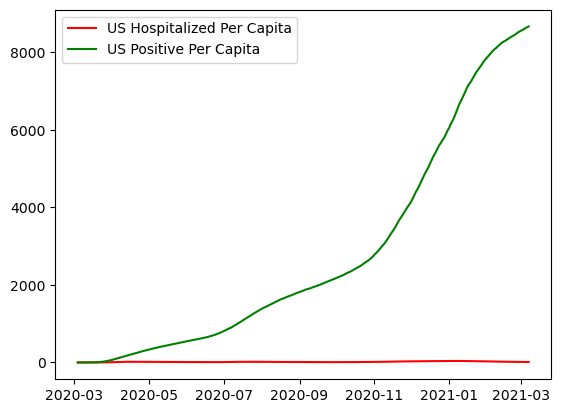

In [52]:
# Plot line charts of US Hospitalized Per Capita and US Positive Per Capita

US_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Hospitalized Per Capita'], label='US Hospitalized Per Capita', color='red')
US_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Positive Per Capita'], label='US Positive Per Capita', color='green')
plt.legend(handles=[US_Hosp_percap, US_Pos_percap], loc='best')
plt.show()

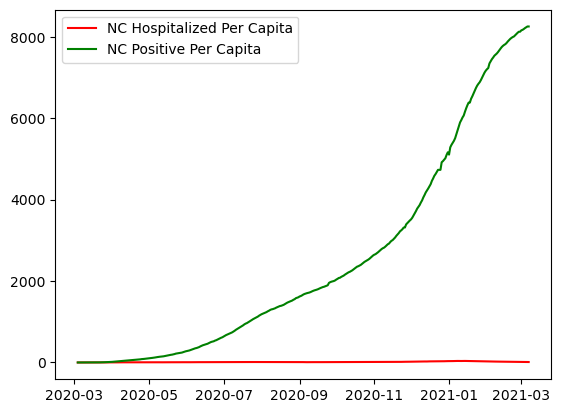

In [53]:
# Plot line charts of NC Hospitalized Per Capita and NC Positive Per Capita

NC_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Hospitalized Per Capita'], label='NC Hospitalized Per Capita', color='red')
NC_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Positive Per Capita'], label='NC Positive Per Capita', color='green')
plt.legend(handles=[NC_Hosp_percap, NC_Pos_percap], loc='best')
plt.show()

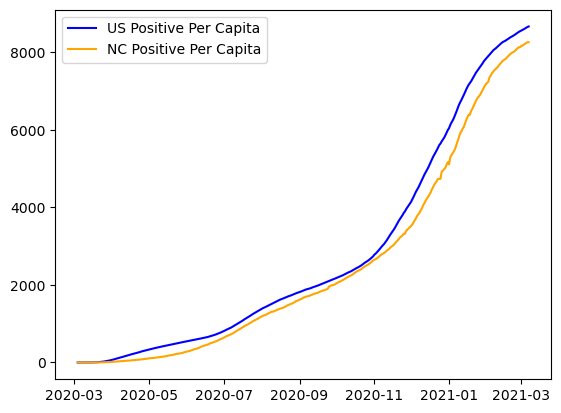

In [54]:
# Plot line charts of US Positive Per Capita and NC Positive Per Capita
US_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Positive Per Capita'], label='US Positive Per Capita', color='blue')
NC_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Positive Per Capita'], label='NC Positive Per Capita', color='orange')
plt.legend(handles=[US_Pos_percap, NC_Pos_percap], loc='best')
plt.show()

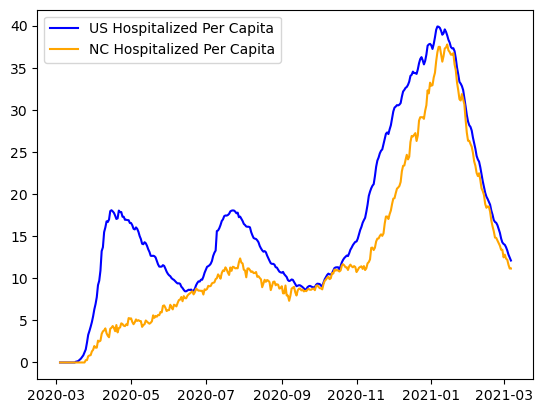

In [55]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Hospitalized Per Capita'], label='US Hospitalized Per Capita', color='blue')
NC_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Hospitalized Per Capita'], label='NC Hospitalized Per Capita', color='orange')
plt.legend(handles=[US_Hosp_percap, NC_Hosp_percap], loc='best')
plt.show()

# Correlation between Positive Cases and Hospitilizations - Scatter Plot

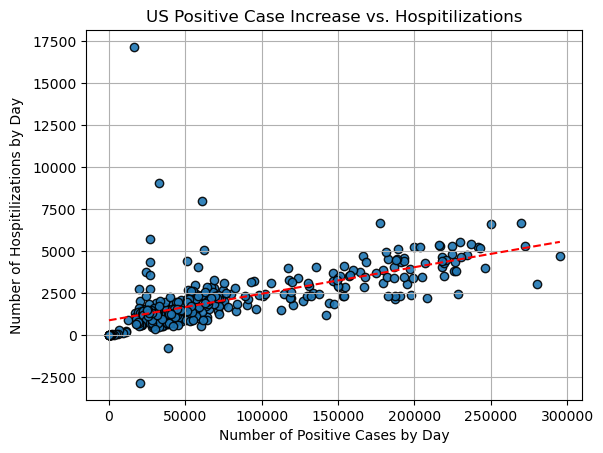

Correlation Coefficient: 0.70


In [67]:
# Extract only needed variables DataFrame
US_Positive_Hospitalizations = us_nc_df[['date','US PositiveIncrease', 'US HospitalizedIncrease']].copy()

#Drop null values
US_Positive_Hospitalizations = us_nc_df.dropna()
US_Positive_Hospitalizations

#Plot the Charts
x_values = US_Positive_Hospitalizations['US PositiveIncrease']
y_values = US_Positive_Hospitalizations['US HospitalizedIncrease']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.9)

#Add Titles and Labels
plt.title('US Positive Case Increase vs. Hospitilizations')
plt.xlabel('Number of Positive Cases by Day')
plt.ylabel('Number of Hospitilizations by Day')
plt.grid()

#Add linear regression lines
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression')

#Show Plot 
plt.show()

#Print Correlation
correlation = us_nc_df['US PositiveIncrease'].corr(us_nc_df['US HospitalizedIncrease'])
print(f"Correlation Coefficient: {correlation:.2f}")

Strong Corrolation between positive cases of COVID and hospitilizations in the U.S.

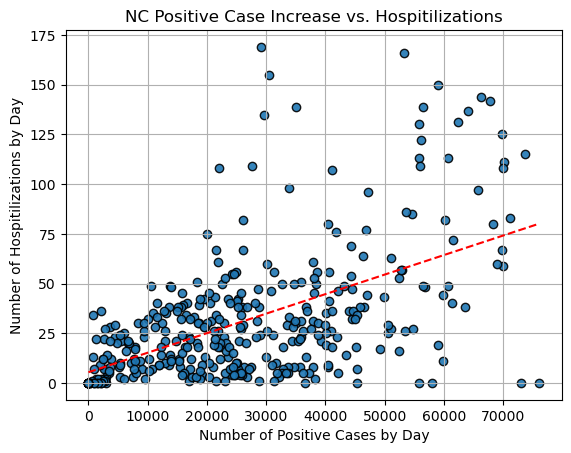

Correlation Coefficient: 0.55


In [68]:
# Extract only needed variables DataFrame
NC_Positive_Hospitalizations = us_nc_df[['date','NC TotalTestResultsIncrease', 'NC DeathIncrease']].copy()

#Drop null values
NC_Positive_Hospitalizations = us_nc_df.dropna()
NC_Positive_Hospitalizations

#Plot the Charts
x_values = NC_Positive_Hospitalizations['NC TotalTestResultsIncrease']
y_values = NC_Positive_Hospitalizations['NC DeathIncrease']
plt.scatter(x_values,y_values,edgecolors='blac',alpha=0.9)

#Add Titles and Labels
plt.title('NC Positive Case Increase vs. Hospitilizations')
plt.xlabel('Number of Positive Cases by Day')
plt.ylabel('Number of Hospitilizations by Day')
plt.grid()

#Add linear regression lines
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression')

#Show Plot 
plt.show()

#Print Correlation
correlation = us_nc_df['NC TotalTestResultsIncrease'].corr(us_nc_df['NC DeathIncrease'])
print(f"Correlation Coefficient: {correlation:.2f}")

Moderate Correlation between positive cases of COVID and hospitilizations in the state of NC

# Correlation between # of Test and Deaths - Line Chart

In [58]:
# State Needed Columns
nc_us_deaths_test = us_nc_df[['date','US Population','US Deaths','US TotalTestResults','NC Population','NC death','NC TotalTestResults']].copy()

# Creates Timeframe to Analyze
nc_us_deaths_test['date'] = pd.to_datetime(nc_us_deaths_test['date'])
print(nc_us_deaths_test['date'].dtypes)

# Set date as the index
nc_us_deaths_test = nc_us_deaths_test.set_index('date')

# Reverse the order for graphing
nc_us_deaths_test = nc_us_deaths_test.iloc[::-1]

# Drop rows with null values
nc_us_deaths_test = nc_us_deaths_test.dropna()

# Add per-capita rows
nc_us_deaths_test['US Death Per Capita'] = (nc_us_deaths_test['US Deaths'] / nc_us_deaths_test['US Population']) * 100000
nc_us_deaths_test['NC Death Per Capita'] = (nc_us_deaths_test['NC death'] / nc_us_deaths_test['NC Population']) * 100000
nc_us_deaths_test['US TotalTestResults Per Capita'] = (nc_us_deaths_test['US TotalTestResults'] / nc_us_deaths_test['US Population']) * 100000
nc_us_deaths_test['NC TotalTestResults Per Capita'] = (nc_us_deaths_test['NC TotalTestResults'] / nc_us_deaths_test['NC Population']) * 100000

nc_us_deaths_test.head()

datetime64[ns]


,US Population,US Deaths,US TotalTestResults,NC Population,NC death,NC TotalTestResults,US Death Per Capita,NC Death Per Capita,US TotalTestResults Per Capita,NC TotalTestResults Per Capita
date,,,,,,,,,,
2020-03-04,331511512,16.0,8023,10449445.0,0.0,0.0,0.004826,0.0,2.420127,0.0
2020-03-05,331511512,20.0,9538,10449445.0,0.0,0.0,0.006033,0.0,2.877125,0.0
2020-03-06,331511512,26.0,11715,10449445.0,0.0,0.0,0.007843,0.0,3.533814,0.0
2020-03-07,331511512,27.0,12646,10449445.0,0.0,0.0,0.008145,0.0,3.814649,0.0
2020-03-08,331511512,31.0,13776,10449445.0,0.0,0.0,0.009351,0.0,4.155512,0.0


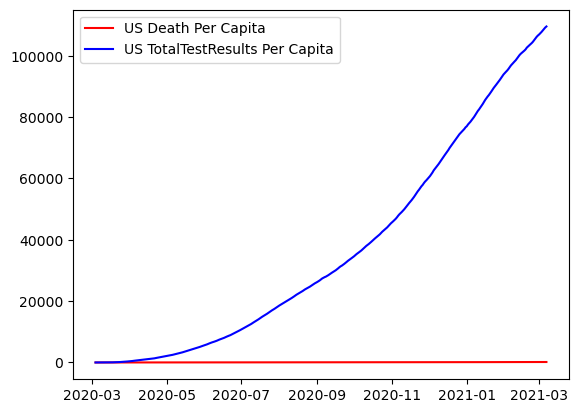

In [59]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US Death Per Capita'], label='US Death Per Capita', color='red')
US_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US TotalTestResults Per Capita'], label='US TotalTestResults Per Capita', color='blue')
plt.legend(handles=[US_Death_percap, US_Test_percap], loc='best')
plt.show()

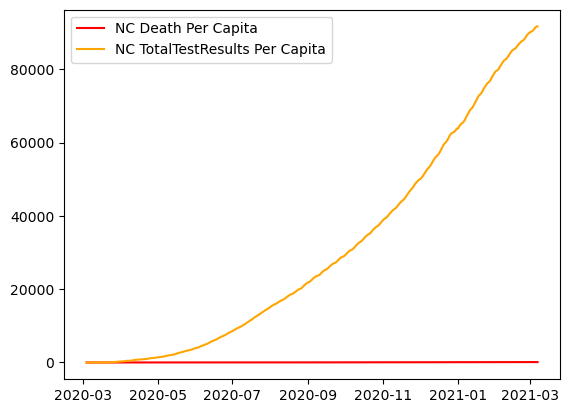

In [60]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
NC_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC Death Per Capita'], label='NC Death Per Capita', color='red')
NC_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC TotalTestResults Per Capita'], label='NC TotalTestResults Per Capita', color='orange')
plt.legend(handles=[NC_Death_percap, NC_Test_percap], loc='best')
plt.show()

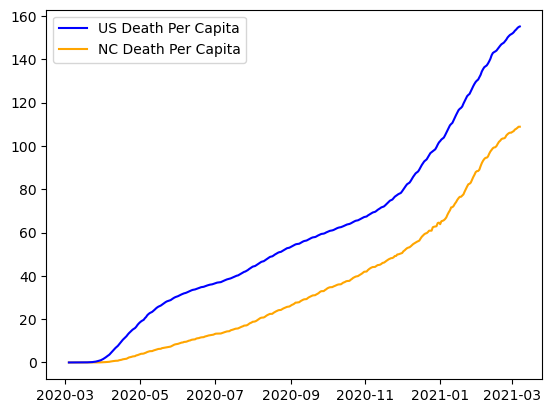

In [61]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
NC_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC Death Per Capita'], label='NC Death Per Capita', color='orange')
US_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US Death Per Capita'], label='US Death Per Capita', color='blue')
plt.legend(handles=[US_Death_percap, NC_Death_percap], loc='best')
plt.show()

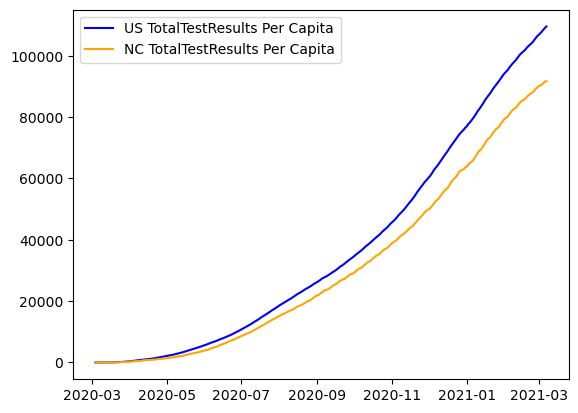

In [62]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US TotalTestResults Per Capita'], label='US TotalTestResults Per Capita', color='blue')
NC_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC TotalTestResults Per Capita'], label='NC TotalTestResults Per Capita', color='orange')
plt.legend(handles=[US_Test_percap, NC_Test_percap], loc='best')
plt.show()

# Correlation between # of Test and Deaths - Scatter Plot

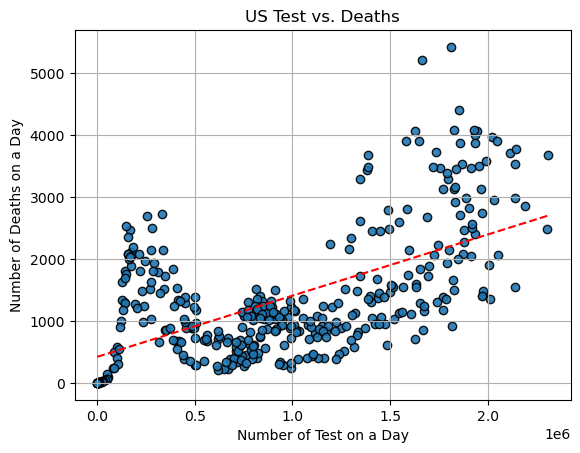

Correlation Coefficient: 0.67


In [69]:
# Extract only needed variables DataFrame
US_Test_Death = us_nc_df[['date','US TotalTestResultsIncrease', 'US DeathIncrease']].copy()

#Drop null values
US_Test_Death = us_nc_df.dropna()
US_Test_Death

#Plot the Charts
x_values = US_Test_Death['US TotalTestResultsIncrease']
y_values = US_Test_Death['US DeathIncrease']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.9)

#Add Titles and Labels
plt.title('US Test vs. Deaths')
plt.xlabel('Number of Test on a Day')
plt.ylabel('Number of Deaths on a Day')
plt.grid()

#Add linear regression lines
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression')

#Show Plot 
plt.show()

#Print Correlation
correlation = us_nc_df['US TotalTestResultsIncrease'].corr(us_nc_df['US DeathIncrease'])
print(f"Correlation Coefficient: {correlation:.2f}")

Strong Correlation of total death increase compared to total test results in the U.S.

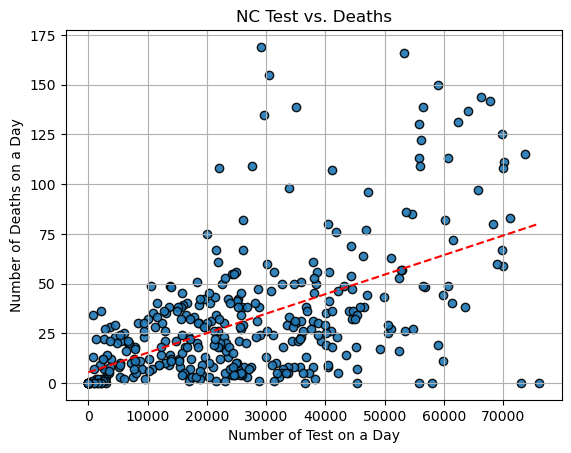

Correlation Coefficient: 0.55


In [66]:
# Extract needed variables DataFrame
NC_Test_Death = us_nc_df[['date','NC TotalTestResultsIncrease', 'NC DeathIncrease']].copy()

#Drop null values
NC_Test_Death = us_nc_df.dropna()
NC_Test_Death

#Plot the Charts
x_values = NC_Test_Death['NC TotalTestResultsIncrease']
y_values = NC_Test_Death['NC DeathIncrease']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.9)

#Add Titles and Labels
plt.title('NC Test vs. Deaths')
plt.xlabel('Number of Test on a Day')
plt.ylabel('Number of Deaths on a Day')
plt.grid()

#Add linear regression lines
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression')

#Show Plot 
plt.show()

correlation = us_nc_df['NC TotalTestResultsIncrease'].corr(us_nc_df['NC DeathIncrease'])
print(f"Correlation Coefficient: {correlation:.2f}")

Moderate Corrolation of number of deaths comapred to total test results increase in the state of NC